In [1]:
import pandas as pd
import numpy as np
import prepare as p

import warnings
warnings.filterwarnings("ignore")

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
                                  
import graphviz
from graphviz import Graph

from scipy import stats

In [2]:
df = pd.read_csv('data/healthcare-dataset-stroke-data.csv')

In [3]:
import prepare

In [4]:
df = prepare.prep_data(df)

In [8]:
df.columns

Index(['gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke', 'age_range'],
      dtype='object')

In [5]:
df = df.drop(columns='age_range')

In [6]:
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,30.6,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [7]:
# create age group dataFrames

over_65 = df[df.age >= 65]
adult_40_65 = df[(df.age >= 40) & (df.age < 65)]
adult_25_40 = df[(df.age >= 25) & (df.age < 40)] # greater than or equal to 25, under 40
adult_18_25 = df[(df.age >= 18) & (df.age < 25)]

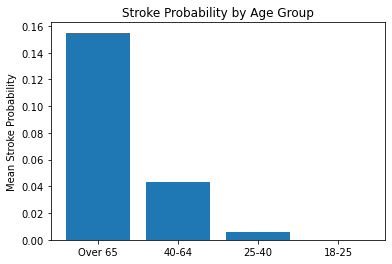

In [8]:
heights = [round(over_65.stroke.mean(), 3), round(adult_40_65.stroke.mean(), 3), round(adult_25_40.stroke.mean(), 3), round(adult_18_25.stroke.mean(), 3)]
x_labels = ['Over 65', '40-64', '25-40', '18-25']
plt.bar(x=x_labels, height=heights)
plt.ylabel("Mean Stroke Probability")
plt.title('Stroke Probability by Age Group')
plt.show()

Adult Body Mass Index or BMI
> - If your BMI is less than 18.5, it falls within the underweight range.
> - If your BMI is 18.5 to 24.9, it falls within the normal or Healthy Weight range.
> - If your BMI is 25.0 to 29.9, it falls within the overweight range.
> - If your BMI is 30.0 or higher, it falls within the obese range.

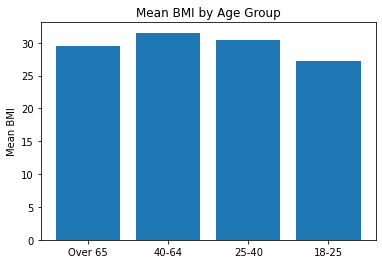

In [9]:
heights = [round(over_65.bmi.mean(), 3), round(adult_40_65.bmi.mean(), 3), round(adult_25_40.bmi.mean(), 3), round(adult_18_25.bmi.mean(), 3)]
x_labels = ['Over 65', '40-64', '25-40', '18-25']
plt.bar(x=x_labels, height=heights)
plt.ylabel("Mean BMI")
plt.title('Mean BMI by Age Group')
plt.show()

# Looking specifically at age group 25 - 40

In [16]:
adult_25_40.size, adult_25_40.shape

(10263, (933, 11))

In [17]:
adult_25_40.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 933 entries, 49 to 5106
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             933 non-null    object 
 1   age                933 non-null    float64
 2   hypertension       933 non-null    object 
 3   heart_disease      933 non-null    object 
 4   ever_married       933 non-null    object 
 5   work_type          933 non-null    object 
 6   residence_type     933 non-null    object 
 7   avg_glucose_level  933 non-null    float64
 8   bmi                933 non-null    float64
 9   smoking_status     933 non-null    object 
 10  stroke             933 non-null    int64  
dtypes: float64(3), int64(1), object(7)
memory usage: 87.5+ KB


In [10]:
adult_25_40.bmi.mean()

30.452840300107166

In [18]:
uw = adult_25_40[adult_25_40.bmi < 18.5]
normal = adult_25_40[(adult_25_40.bmi >= 18.5) & (adult_25_40.bmi < 25)]
ow = adult_25_40[(adult_25_40.bmi >= 25) & (adult_25_40.bmi < 30)]
obese = adult_25_40[adult_25_40.bmi >= 30]

In [19]:
uw.shape, normal.shape, ow.shape, obese.shape

((5, 11), (235, 11), (281, 11), (412, 11))

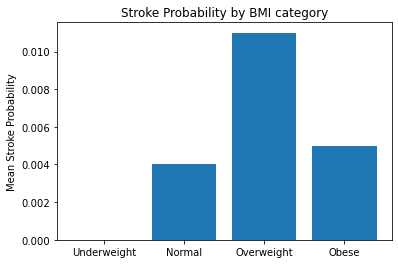

In [20]:
heights = [round(uw.stroke.mean(), 3), round(normal.stroke.mean(), 3), round(ow.stroke.mean(), 3), round(obese.stroke.mean(), 3)]
x_labels = ['Underweight', 'Normal', 'Overweight', 'Obese']
plt.bar(x=x_labels, height=heights)
plt.ylabel("Mean Stroke Probability")
plt.title('Stroke Probability by BMI category')
plt.show()

In [21]:
obese.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,residence_type,avg_glucose_level,bmi,smoking_status,stroke
49,Female,39.0,1,0,Yes,Private,Rural,58.09,39.2,smokes,1
133,Female,38.0,0,0,Yes,Private,Rural,101.45,31.1,formerly smoked,1
257,Female,32.0,0,0,Yes,Private,Rural,77.67,32.3,smokes,0
261,Female,37.0,0,0,Yes,Private,Rural,162.96,39.4,never smoked,0
264,Male,35.0,0,0,No,Private,Rural,85.37,33.0,never smoked,0


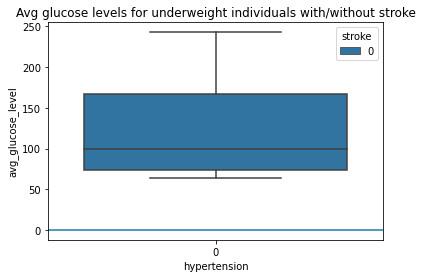

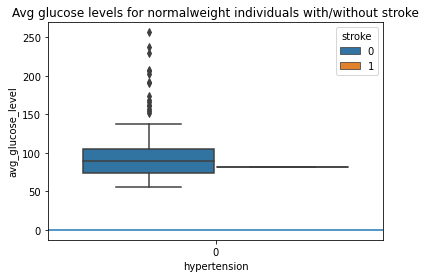

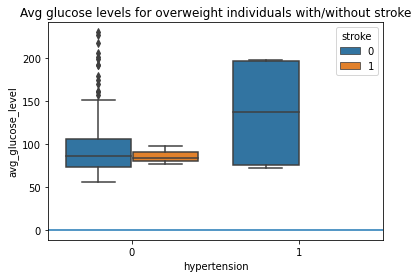

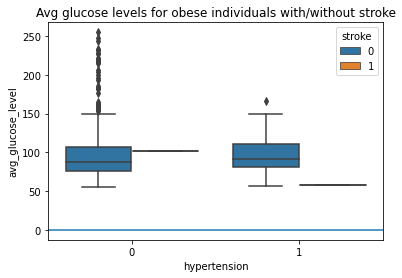

In [27]:
list_of_df = [uw, normal, ow, obese]
list_of_df_names = ['underweight', 'normalweight', 'overweight', 'obese']

i=0

for df in list_of_df:
    plt.title(f"Avg glucose levels for {list_of_df_names[i]} individuals with/without stroke")
    i+=1
    sns.boxplot(x="hypertension", y="avg_glucose_level", data=df, hue="stroke")
    population_survival_rate = df.stroke.mean()
    plt.axhline(population_survival_rate)
    plt.show()

In [ ]:
# Takeaways: for models
- No strokes or hypertension for underweight individuals
- No hypertension for normalweight individuals
- OW individuals with hypertension have higher avg_glucose_levels
- Avg_glucose_level is about the same regardless of hypertension for obese individuals. 

In [28]:
normal.stroke.sum()

1

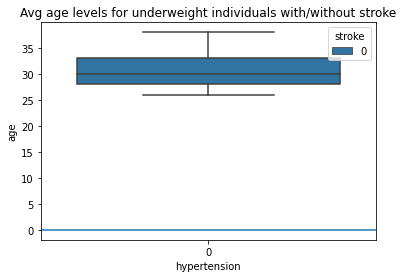

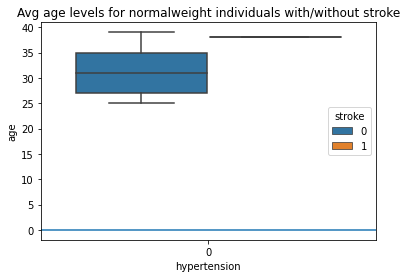

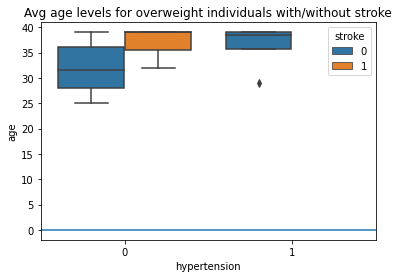

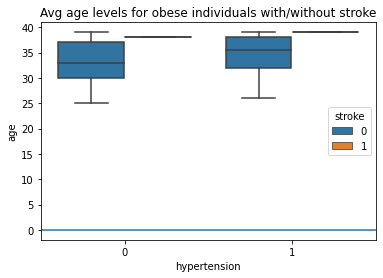

In [29]:
list_of_df = [uw, normal, ow, obese]
list_of_df_names = ['underweight', 'normalweight', 'overweight', 'obese']

i=0

for df in list_of_df:
    plt.title(f"Avg age levels for {list_of_df_names[i]} individuals with/without stroke")
    i+=1
    sns.boxplot(x="hypertension", y="age", data=df, hue="stroke")
    population_survival_rate = df.stroke.mean()
    plt.axhline(population_survival_rate)
    plt.show()

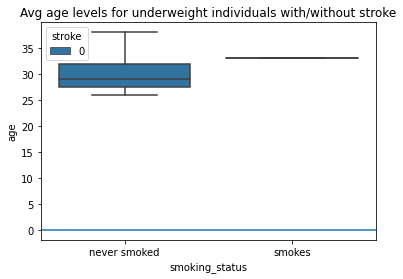

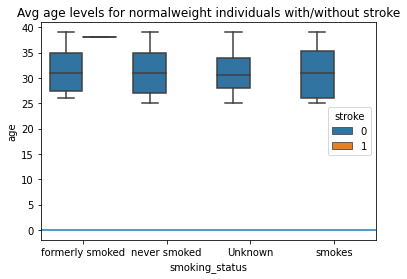

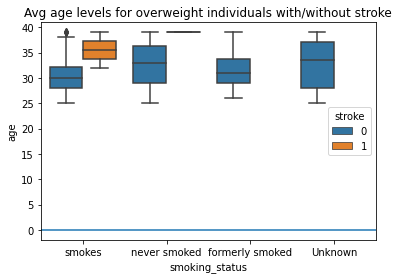

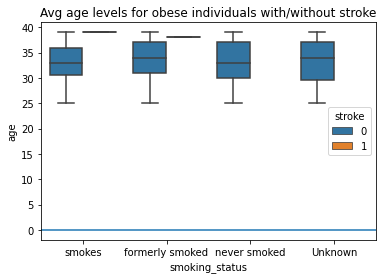

In [31]:
list_of_df = [uw, normal, ow, obese]
list_of_df_names = ['underweight', 'normalweight', 'overweight', 'obese']

i=0

for df in list_of_df:
    plt.title(f"Avg age levels for {list_of_df_names[i]} individuals with/without stroke")
    i+=1
    sns.boxplot(x="smoking_status", y="age", data=df, hue="stroke")
    population_survival_rate = df.stroke.mean()
    plt.axhline(population_survival_rate)
    plt.show()

In [34]:
uw.stroke.sum(), normal.stroke.sum(), ow.stroke.sum(), obese.stroke.sum()

(0, 1, 3, 2)

In [35]:
adult_25_40[adult_25_40.stroke == 1]

,gender,age,hypertension,heart_disease,ever_married,work_type,residence_type,avg_glucose_level,bmi,smoking_status,stroke
49,Female,39.0,1,0,Yes,Private,Rural,58.09,39.2,smokes,1
118,Female,38.0,0,0,No,Self-employed,Urban,82.28,24.0,formerly smoked,1
133,Female,38.0,0,0,Yes,Private,Rural,101.45,31.1,formerly smoked,1
182,Female,32.0,0,0,Yes,Private,Rural,76.13,29.9,smokes,1
210,Female,39.0,0,0,Yes,Private,Urban,83.24,26.3,never smoked,1
228,Female,39.0,0,0,Yes,Self-employed,Urban,97.76,29.6,smokes,1


In [36]:
# all female, 1 hypertension, 0 heart_disease, 5 married, 4 private 2 self employed, 
# half rural half urban, glucose 60-100, bmi 24-39, 5 smoked once

In [45]:
df[df.age < 69].work_type.value_counts()

Private          2534
children          687
Govt_job          564
Self-employed     493
Never_worked       22
Name: work_type, dtype: int64

In [43]:
df.shape

(5109, 12)

In [48]:
df[df.stroke==1].age.median(), df[df.stroke==1].age.mean()

(71.0, 67.72819277108434)

In [2]:
from sklearn.naive_bayes import GaussianNB

In [4]:
df = pd.read_csv('healthcare-dataset-stroke-data.csv')
df = p.prep_data(df).drop(columns=['age_range',])
df['stroke'] = df['stroke'].astype('int64')
# set list of columns to one-hot encode
col_list = ['gender','ever_married','work_type','residence_type','smoking_status']
# apply one-hot encoding using above list
df = pd.get_dummies(df, columns=col_list, drop_first=True)
# split using same random state as explore stage
trainvalidate, test = train_test_split(df, test_size=.2, random_state=777)
train, validate = train_test_split(trainvalidate, test_size=.25, random_state=777)
# isolate target
X_train, y_train = train.drop(columns='stroke'), train.stroke
X_validate, y_validate = validate.drop(columns='stroke'), validate.stroke
X_test, y_test = test.drop(columns='stroke'), test.stroke

In [5]:
                                   
# build, fit our best model inline (store model into cache)
# create naive bayes model
nb = GaussianNB(var_smoothing=0.00001).fit(X_train, y_train)
# make predictions in new column
y_train = pd.DataFrame(y_train)
y_train['nb_best_model'] = nb.predict(X_train)
y_test = pd.DataFrame(y_test).rename(columns={'stroke':'out_actuals'})
y_test['nb_best_model']= nb.predict(X_test)

In [6]:
y_train.head()

,stroke,nb_best_model
448,0,0
4128,0,1
4699,0,0
5035,0,0
3007,0,0


In [9]:
X_test

,age,hypertension,heart_disease,avg_glucose_level,bmi,gender_Male,ever_married_Yes,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,residence_type_Urban,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
1590,13.00,0,0,99.13,22.8,0,0,0,0,0,1,1,0,0,0
3323,9.00,0,0,82.64,14.5,0,0,0,0,0,1,1,0,0,0
4163,82.00,1,0,222.52,28.1,0,1,0,1,0,0,1,1,0,0
2527,78.00,0,1,145.03,26.8,1,1,0,1,0,0,1,1,0,0
3274,50.00,0,0,151.25,31.5,0,1,0,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2533,60.00,0,0,70.52,26.5,1,1,0,1,0,0,0,1,0,0
1798,56.00,0,0,224.63,42.8,0,1,0,0,1,0,1,0,1,0
4584,9.00,0,0,75.84,21.5,1,0,0,0,0,1,1,0,0,0
3704,1.08,0,0,74.50,18.9,1,0,0,0,0,1,0,0,0,0


In [19]:
y_proba = nb.predict_proba(X_test)

In [27]:
y_proba

array([[1.00000000e+00, 4.42990327e-12],
       [1.00000000e+00, 3.43364089e-13],
       [5.65130535e-03, 9.94348695e-01],
       ...,
       [1.00000000e+00, 1.36993123e-12],
       [1.00000000e+00, 8.62440252e-14],
       [1.00000000e+00, 1.02975041e-13]])

In [33]:
Probabilities = pd. DataFrame(y_proba, columns=['Prob of No Stroke', 'Stroke'])

In [34]:
Probabilities

,Prob of No Stroke,Stroke
0,1.000000,4.429903e-12
1,1.000000,3.433641e-13
2,0.005651,9.943487e-01
3,0.002358,9.976416e-01
4,0.962513,3.748732e-02
...,...,...
1017,0.848536,1.514643e-01
1018,0.489260,5.107397e-01
1019,1.000000,1.369931e-12
1020,1.000000,8.624403e-14


In [40]:
y_test.reset_index().head()

,index,out_actuals,nb_best_model
0,1590,0,0
1,3323,0,0
2,4163,0,1
3,2527,0,1
4,3274,0,0


In [41]:
Predictions = pd.concat([y_test, Probabilities], axis=1, ignore_index=True)

In [42]:
Predictions.head()

,0,1,2,3
0,NaN,NaN,1.000000,4.429903e-12
1,NaN,NaN,1.000000,3.433641e-13
2,1.0,1.0,0.005651,9.943487e-01
3,1.0,0.0,0.002358,9.976416e-01
4,1.0,1.0,0.962513,3.748732e-02
